# iRFP mask shape stats

Meausres of average iRFP nuclear mask shape and size for paramter tuning of H2B-GFP post-processing

In [1]:
import napari
from octopuslite import DaskOctopusLiteLoader
import glob
import numpy as np

import numpy as np
from tqdm.auto import tqdm

def compute(dask_image_stack, N = None):
    
    """lazy hack to get around dask not loading transformed stacks in one go"""
    
    if N == None:
        N = (0, len(dask_image_stack) )
        
    return np.stack([frame.compute().astype(np.uint8) for frame in tqdm(dask_image_stack[N[0]:N[1]], total = N[1]-N[0])], axis = 0)

# Load images

In [2]:
# define experiment ID and select a position
expt = 'ND0024'
pos = 'Pos13'
# point to where the data is
root_dir = '/home/nathan/data/kraken/ras'
image_path = f'{root_dir}/{expt}/{pos}/{pos}_images'
transform_paths = glob.glob(f'{root_dir}/{expt}/{pos}/*.npy')
print(transform_paths)
tracks_path = f'{root_dir}/{expt}/{pos}/tracks.h5'

['/home/nathan/data/kraken/ras/ND0024/Pos13/transform_tensor.npy']


In [3]:
transform_path = transform_paths[0] #'/home/nathan/data/kraken/ras/ND0019/Pos2/mask_reversed_clipped_transform_tensor.npy'

In [4]:
# lazily load images
images = DaskOctopusLiteLoader(image_path,
                              transforms = transform_path,
                              crop = (1200,1600),
                              remove_background = True)
                              
images.channels

Using cropping: (1200, 1600)


[<Channels.BRIGHTFIELD: 0>,
 <Channels.GFP: 1>,
 <Channels.RFP: 2>,
 <Channels.IRFP: 3>,
 <Channels.MASK: 99>]

In [5]:
gfp = images['gfp']
rfp = images['rfp']#.compute().astype(np.uint8)
# irfp = images['irfp']
masks = images['mask']#.compute().astype(np.uint8)
#masks_old = images['mask_gfp']

# iRFP masks

Generating statistics about upper and lower bounds for area and ellipsivity of definitive GFP segments (found by iRFP segmentation)

ND0022 Pos12

In [47]:
irfp_masks = DaskOctopusLiteLoader('/home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/')['mask_irfp']

In [48]:
from tqdm.auto import tqdm

In [49]:
mask = (label(irfp_masks[282])[0])

matplotlib_plugin.py (150): Low image data range; displaying image with stretched contrast.


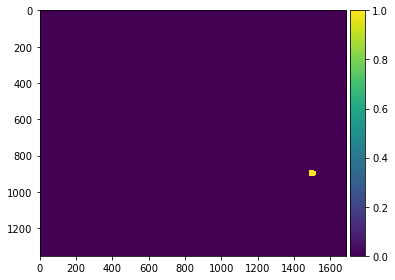

In [50]:
imshow((mask==169).astype(int))

In [51]:
props = [] # list of image region props
area_dist = []
ecc_dist = []
for mask in tqdm(irfp_masks):
    mask_props = measure.regionprops(label(mask)[0])
    #props.append(mask_props)
    for segment in mask_props:
        area_dist.append(segment.area)
        ecc_dist.append(segment.eccentricity)

  0%|          | 0/1098 [00:00<?, ?it/s]

(array([1.7000e+01, 1.5770e+03, 4.2860e+03, 3.1940e+03, 2.0070e+03,
        1.5220e+03, 1.5010e+03, 1.1960e+03, 1.2700e+03, 1.2730e+03,
        1.3480e+03, 1.4360e+03, 1.5840e+03, 1.7810e+03, 1.9950e+03,
        2.3780e+03, 2.9130e+03, 3.5860e+03, 4.5930e+03, 5.5700e+03,
        6.7850e+03, 7.2440e+03, 7.8390e+03, 8.3830e+03, 9.2730e+03,
        9.7340e+03, 1.0392e+04, 1.0899e+04, 1.1307e+04, 1.0992e+04,
        1.1554e+04, 1.2005e+04, 1.2458e+04, 1.1370e+04, 1.0383e+04,
        1.0062e+04, 9.8840e+03, 9.0050e+03, 8.4170e+03, 7.9740e+03,
        7.9760e+03, 7.2380e+03, 6.7050e+03, 6.2910e+03, 6.1850e+03,
        5.6900e+03, 5.6320e+03, 5.3110e+03, 5.2010e+03, 5.0250e+03,
        4.5680e+03, 4.4230e+03, 4.3270e+03, 3.7280e+03, 3.4750e+03,
        3.1420e+03, 2.9960e+03, 2.5590e+03, 2.2110e+03, 1.9400e+03,
        1.8700e+03, 1.7010e+03, 1.5830e+03, 1.5820e+03, 1.4790e+03,
        1.3880e+03, 1.2360e+03, 1.2560e+03, 1.0920e+03, 1.0110e+03,
        9.8500e+02, 8.6400e+02, 8.1800e+02, 6.89

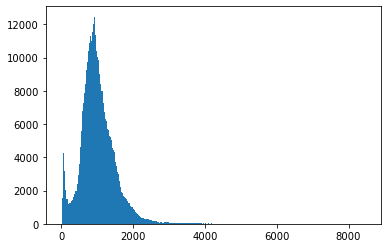

In [54]:
plt.hist(area_dist, bins = 300)

([<matplotlib.axis.XTick at 0x7f8bb39d3bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

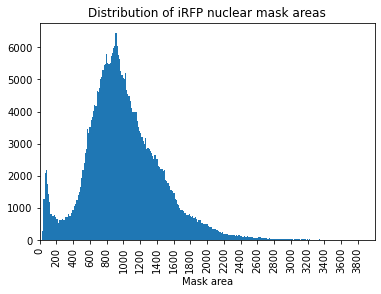

In [70]:
plt.hist(area_dist, bins = 600,)
plt.xlim(0,4000)
plt.title('Distribution of iRFP nuclear mask areas')
plt.xlabel('Mask area')
plt.xticks([i for i in range(0,4000, 200)], rotation = 'vertical')

([<matplotlib.axis.XTick at 0x7f8bb86772e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

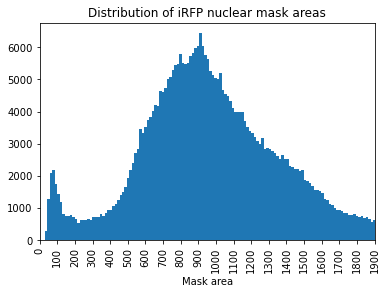

In [68]:
plt.hist(area_dist, bins = 600,)
plt.xlim(0,1000)
plt.title('Distribution of iRFP nuclear mask areas')
plt.xlabel('Mask area')
plt.xticks([i for i in range(0,2000, 100)], rotation = 'vertical')

In [56]:
np.std(area_dist)

490.2299756669125

Text(0.5, 0, 'Eccentricity')

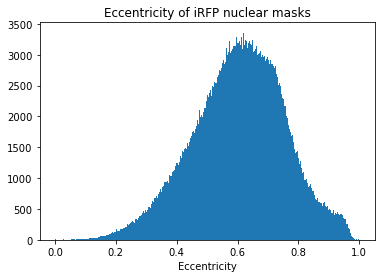

In [71]:
plt.hist(ecc_dist, bins = 300)
plt.title('Eccentricity of iRFP nuclear masks')
plt.xlabel('Eccentricity')

In [58]:
np.std(ecc_dist)

0.150951598884306

In [59]:
import pandas as pd

In [60]:
area_df = pd.DataFrame(area_dist)
ecc_df = pd.DataFrame(ecc_dist)

In [61]:
area_df.quantile(0.98)

0    2190.0
Name: 0.98, dtype: float64

In [62]:
area_df.quantile(0.02)

0    96.0
Name: 0.02, dtype: float64

Check irfp masks

In [ ]:
irfp_ = DaskOctopusLiteLoader('/home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/')['irfp']
gfp_ = DaskOctopusLiteLoader('/home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/')['gfp']

In [ ]:
viewer = napari.Viewer()
viewer.add_image(irfp_.astype(np.uint8), name="irfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'red')
viewer.add_image(gfp_.astype(np.uint8), name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')#, is_pyramid=False)
viewer.add_labels(irfp_masks.astype(np.uint16), name = 'masks',
               blending = 'additive',)
